<a href="https://colab.research.google.com/github/Room1097/ECG_Feature_Analysis_DAV_Project/blob/main/DAV_ML_Implementation_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
file_path = '/content/drive/My Drive/a01.csv'
df = pd.read_csv(file_path)

X_raw = df.iloc[:, :-1] #signals
y = df.iloc[:, -1] #label

df.head()

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,labels
0,-0.060,-0.065,-0.060,-0.075,-0.065,-0.070,-0.070,-0.090,-0.080,-0.095,...,-0.105,-0.080,-0.07,-0.010,-0.03,0.015,0.04,0.070,0.090,0
1,0.140,0.170,0.215,0.245,0.250,0.240,0.240,0.255,0.230,0.180,...,-0.085,-0.080,-0.09,-0.095,-0.10,-0.085,-0.11,-0.095,-0.100,0
2,-0.100,-0.105,-0.105,-0.125,-0.110,-0.110,-0.100,-0.130,-0.110,-0.085,...,-0.060,-0.035,-0.03,-0.045,-0.05,-0.025,-0.04,-0.055,-0.110,0
3,-0.060,-0.085,-0.085,-0.085,-0.090,-0.145,-0.065,-0.130,-0.095,-0.170,...,0.000,0.010,0.00,-0.010,-0.04,-0.025,-0.01,0.030,0.020,0
4,0.025,0.030,0.100,0.115,0.095,0.165,0.185,0.085,0.065,0.015,...,-0.090,-0.080,-0.06,-0.030,0.00,0.030,0.05,0.070,0.115,0


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,labels
484,-0.150,-0.165,-0.195,0.065,0.770,1.285,0.685,-0.300,-0.705,-0.525,...,-0.045,-0.030,-0.045,-0.035,-0.055,-0.050,-0.045,-0.045,-0.05,1
485,-0.045,-0.040,-0.055,-0.055,-0.060,-0.055,-0.055,-0.045,-0.070,-0.055,...,-0.060,-0.140,-0.210,-0.185,-0.200,-0.175,-0.225,0.020,0.87,1
486,1.740,1.130,-0.455,-0.710,-0.355,-0.135,-0.120,-0.115,-0.100,-0.100,...,-0.020,-0.035,-0.040,-0.045,-0.050,-0.030,-0.055,-0.055,-0.06,1
487,-0.040,-0.080,-0.060,-0.090,-0.060,-0.050,-0.065,-0.055,-0.080,-0.050,...,-0.050,-0.050,-0.055,-0.040,-0.070,-0.060,-0.060,-0.050,-0.05,1
488,-0.045,-0.045,-0.040,-0.045,-0.040,-0.045,-0.040,-0.045,-0.040,-0.045,...,-0.020,0.000,-0.025,-0.025,-0.040,-0.040,-0.050,-0.050,-0.04,1


In [5]:
df.shape

(489, 6001)

## plot initial data

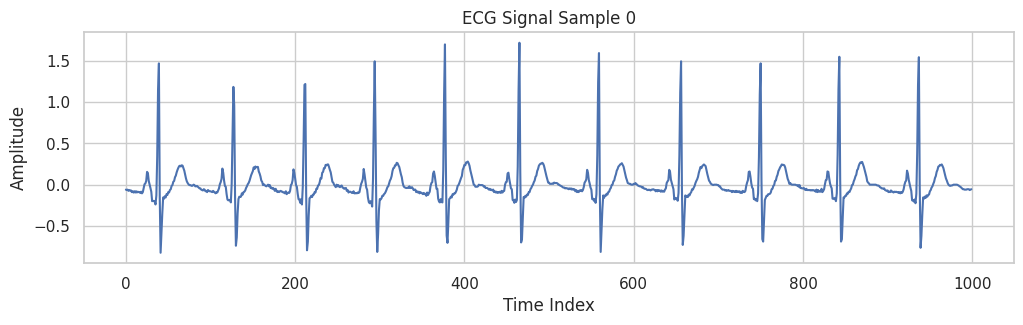

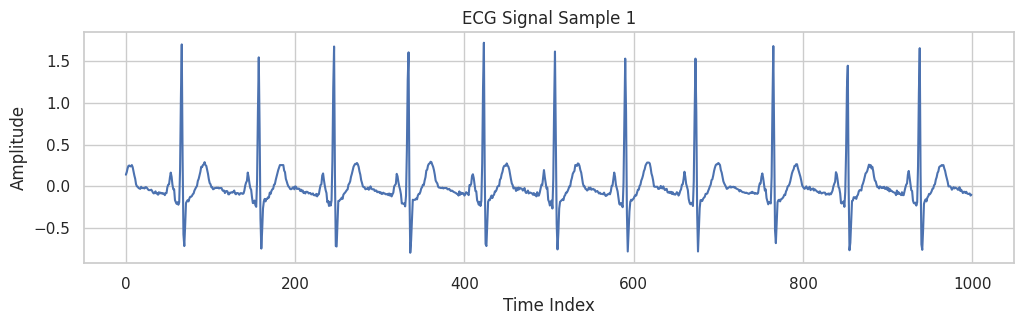

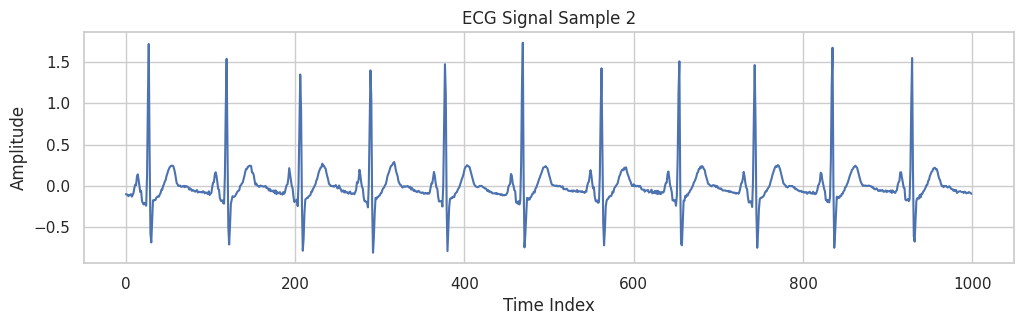

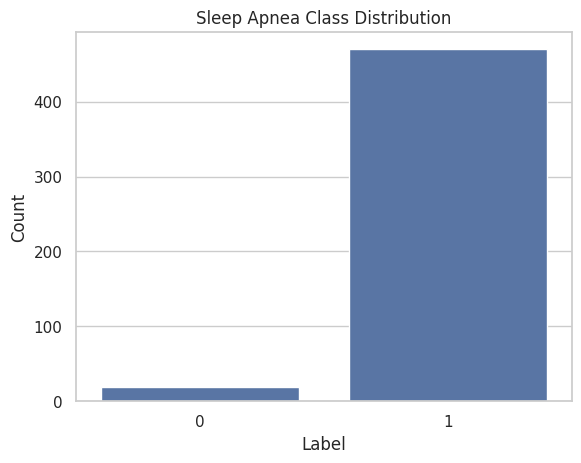

In [6]:
for i in range(3):
    plt.figure(figsize=(12, 3))
    plt.plot(X_raw.iloc[i].values[:1000])
    plt.title(f"ECG Signal Sample {i}")
    plt.xlabel("Time Index")
    plt.ylabel("Amplitude")
    plt.show()

sns.countplot(x=y)
plt.title("Sleep Apnea Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Feature Extraction

In [7]:
from scipy.signal import welch, find_peaks
from scipy.stats import skew, kurtosis, entropy
import numpy as np

In [8]:
def extract_features(signal):
    if np.isnan(signal).any():
        return {key: np.nan for key in feature_names}

    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['var'] = np.var(signal)
    features['median'] = np.median(signal)
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['range'] = np.ptp(signal)
    features['q1'] = np.percentile(signal, 25)
    features['q3'] = np.percentile(signal, 75)
    features['iqr'] = features['q3'] - features['q1']

    features['skewness'] = skew(signal)
    features['kurtosis'] = kurtosis(signal)
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['zero_crossings'] = np.count_nonzero(np.diff(np.sign(signal)))
    abs_diff = np.abs(np.diff(signal))
    features['abs_diff_mean'] = np.mean(abs_diff)
    features['abs_diff_std'] = np.std(abs_diff)
    features['symmetry'] = np.mean(np.abs(signal - signal[::-1]))
    features['signal_energy'] = np.sum(signal**2)
    hist, _ = np.histogram(signal, bins=100, density=True)
    features['signal_entropy'] = entropy(hist + 1e-6)

    freqs, psd = welch(signal, fs=250)
    features['total_power'] = np.sum(psd)
    peaks, _ = find_peaks(signal, distance=50, height=np.mean(signal))
    rr = np.diff(peaks) if len(peaks) > 1 else [0]
    features['num_beats'] = len(peaks)
    features['mean_rr'] = np.mean(rr) if len(rr) > 0 else 0
    features['std_rr'] = np.std(rr) if len(rr) > 0 else 0
    features['min_rr'] = np.min(rr) if len(rr) > 0 else 0
    features['max_rr'] = np.max(rr) if len(rr) > 0 else 0
    features['heart_rate'] = (60 / (features['mean_rr'] / 250)) if features['mean_rr'] > 0 else 0
    return features

feature_names = [
    'mean','std','var','median','min','max','range','q1','q3','iqr','skewness','kurtosis',
    'rms','zero_crossings','abs_diff_mean','abs_diff_std','symmetry','signal_energy',
    'signal_entropy','total_power', 'num_beats','mean_rr','std_rr','min_rr','max_rr','heart_rate'
]


In [9]:
def extract_features_part1(signal, fs=250):
    features = {}

    # Basic Statistics
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['var'] = np.var(signal)
    features['median'] = np.median(signal)
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['range'] = np.ptp(signal)

    # Advanced Features
    features['q1'] = np.percentile(signal, 25)
    features['q3'] = np.percentile(signal, 75)
    features['iqr'] = features['q3'] - features['q1']
    features['skewness'] = skew(signal)
    features['kurtosis'] = kurtosis(signal)
    features['abs_diff_mean'] = np.mean(np.abs(np.diff(signal)))
    features['abs_diff_std'] = np.std(np.abs(np.diff(signal)))
    peaks, _ = find_peaks(signal, distance=50, height=np.mean(signal))
    rr = np.diff(peaks) if len(peaks) > 1 else [0]
    features['num_beats'] = len(peaks)
    features['mean_rr'] = np.mean(rr) if len(rr) > 0 else 0
    features['mad'] = np.median(np.abs(signal - np.median(signal)))
    features['mean_crossing_rate'] = np.mean(np.diff(np.sign(signal - np.mean(signal))) != 0)
    features['line_length'] = np.sum(np.abs(np.diff(signal)))
    features['max_peak_height'] = np.max(signal[peaks]) if len(peaks) > 0 else 0

    return features


In [10]:
def extract_features_part2(signal, fs=250):
    features = {}

    # Basic Statistics
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['var'] = np.var(signal)
    features['median'] = np.median(signal)
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['range'] = np.ptp(signal)

    # Advanced Features
    features['zero_crossings'] = np.count_nonzero(np.diff(np.sign(signal)))
    features['symmetry'] = np.mean(np.abs(signal - signal[::-1]))
    hist, _ = np.histogram(signal, bins=100, density=True)
    features['signal_entropy'] = entropy(hist + 1e-6)
    peaks, _ = find_peaks(signal, distance=50, height=np.mean(signal))
    rr = np.diff(peaks) if len(peaks) > 1 else [0]
    features['std_rr'] = np.std(rr) if len(rr) > 0 else 0
    features['heart_rate'] = (60 / (np.mean(rr) / fs)) if np.mean(rr) > 0 else 0
    features['hjorth_activity'] = np.var(signal)
    diff1 = np.diff(signal)
    features['hjorth_mobility'] = np.sqrt(np.var(diff1) / np.var(signal))
    features['spectral_centroid'] = np.sum(np.fft.fftfreq(len(signal), 1/fs) * np.abs(np.fft.fft(signal))) / np.sum(np.abs(np.fft.fft(signal)))
    features['fractal_dimension'] = np.log10(len(signal)) / (np.log10(len(signal)) + np.log10(np.max(np.abs(np.diff(signal))) + 1e-6))
    fft_vals = np.abs(np.fft.fft(signal))
    features['fft_mean'] = np.mean(fft_vals)

    return features


In [11]:
def extract_features_part3(signal, fs=250):
    features = {}

    # Basic Statistics
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['var'] = np.var(signal)
    features['median'] = np.median(signal)
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['range'] = np.ptp(signal)

    # Advanced Features
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['signal_energy'] = np.sum(signal**2)
    freqs, psd = welch(signal, fs=fs)
    features['total_power'] = np.sum(psd)
    features['spectral_entropy'] = entropy(psd + 1e-6)
    features['hjorth_complexity'] = (
        np.sqrt(np.var(np.diff(np.diff(signal))) / np.var(np.diff(signal)))
        if np.var(np.diff(signal)) > 0 else 0
    )
    features['bandpower_alpha'] = np.sum(psd[(freqs >= 8) & (freqs <= 13)])
    peaks, _ = find_peaks(signal, distance=50, height=np.mean(signal))
    rr = np.diff(peaks) if len(peaks) > 1 else [0]
    features['max_rr'] = np.max(rr) if len(rr) > 0 else 0
    features['iqr'] = np.percentile(signal, 75) - np.percentile(signal, 25)
    features['q1'] = np.percentile(signal, 25)
    features['q3'] = np.percentile(signal, 75)
    features['dominant_frequency'] = freqs[np.argmax(psd)] if len(psd) > 0 else 0

    return features


In [12]:
feature_names_1 = [
    'mean', 'std', 'var', 'median', 'min', 'max', 'range',
    'q1', 'q3', 'iqr', 'skewness', 'kurtosis',
    'abs_diff_mean', 'abs_diff_std', 'symmetry',
    'num_beats', 'mean_rr', 'mad',
    'mean_crossing_rate', 'line_length', 'max_peak_height',
    'fractal_dimension', 'hjorth_activity'
]


In [13]:
feature_names_2 = [
    'mean', 'std', 'var', 'median', 'min', 'max', 'range',
    'zero_crossings', 'signal_entropy', 'heart_rate',
    'std_rr', 'hjorth_mobility', 'hjorth_complexity',
    'spectral_centroid', 'fft_mean', 'bandpower_alpha',
    'q1', 'q3', 'iqr', 'rms', 'signal_energy', 'max_rr'
]


In [14]:
feature_names_3 = [
    'mean', 'std', 'var', 'median', 'min', 'max', 'range',
    'dominant_frequency', 'total_power', 'spectral_entropy',
    'min_rr', 'signal_energy', 'rms',
    'fft_mean', 'fractal_dimension', 'hjorth_activity',
    'hjorth_mobility', 'q1', 'q3', 'iqr', 'skewness', 'kurtosis'
]


In [16]:
X_features = pd.DataFrame([extract_features_part1(row) for row in X_raw.values])
X_features = X_features.dropna() #clean dataset
y_cleaned = y[X_features.index] #clean labels

In [17]:
X_features

,mean,std,var,median,min,max,range,q1,q3,iqr,skewness,kurtosis,abs_diff_mean,abs_diff_std,num_beats,mean_rr,mad,mean_crossing_rate,line_length,max_peak_height
0,-0.000919,0.255151,0.065102,-0.040,-0.885,1.750,2.635,-0.090,0.040,0.130,2.823821,16.244233,0.070100,0.190596,67,90.000000,0.060,0.086181,420.530,1.750
1,0.000766,0.268866,0.072289,-0.035,-0.900,1.740,2.640,-0.095,0.055,0.150,2.682191,14.860631,0.078115,0.200517,72,83.521127,0.065,0.080513,468.610,1.740
2,0.000017,0.271984,0.073975,-0.030,-1.035,1.750,2.785,-0.095,0.065,0.160,2.486454,14.055261,0.086183,0.205434,74,81.164384,0.075,0.109018,517.010,1.750
3,-0.000441,0.281247,0.079100,-0.035,-1.170,1.845,3.015,-0.095,0.070,0.165,1.920162,11.388732,0.090243,0.216141,81,74.612500,0.080,0.103851,541.370,1.845
4,0.000551,0.267258,0.071427,-0.040,-1.035,1.700,2.735,-0.095,0.060,0.155,2.111700,11.644186,0.080365,0.201537,76,79.466667,0.070,0.079013,482.110,1.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.000638,0.260477,0.067848,-0.030,-1.060,2.110,3.170,-0.090,0.055,0.145,2.640288,16.091270,0.084014,0.205634,79,75.897436,0.065,0.114686,504.000,2.110
485,0.000462,0.246362,0.060694,-0.035,-1.025,2.160,3.185,-0.080,0.020,0.100,3.187231,21.769178,0.064608,0.191350,78,77.272727,0.050,0.082514,387.585,2.160
486,0.003210,0.243199,0.059146,-0.035,-0.905,2.110,3.015,-0.080,0.025,0.105,3.117455,20.311270,0.062695,0.186813,62,96.819672,0.050,0.079847,376.110,2.110
487,0.000013,0.245238,0.060142,-0.040,-1.035,2.090,3.125,-0.085,0.025,0.110,2.977300,19.310933,0.066573,0.188210,64,93.349206,0.050,0.081014,399.370,2.090


# plot after feature extraction

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Rename for simplicity
df = X_features.copy()

df['labels'] = y_cleaned.values


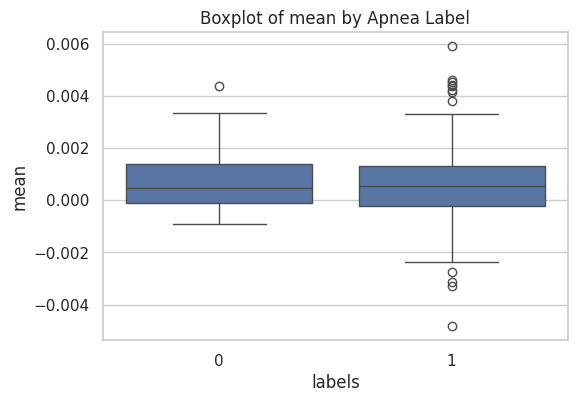

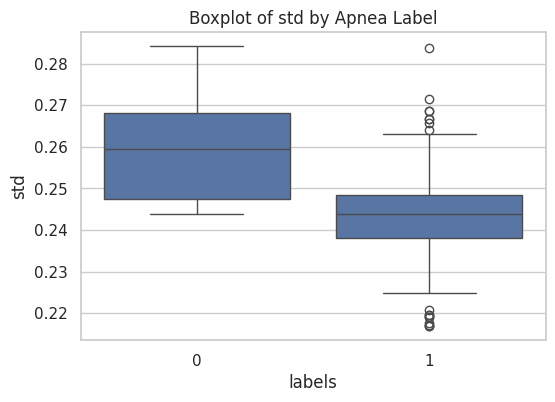

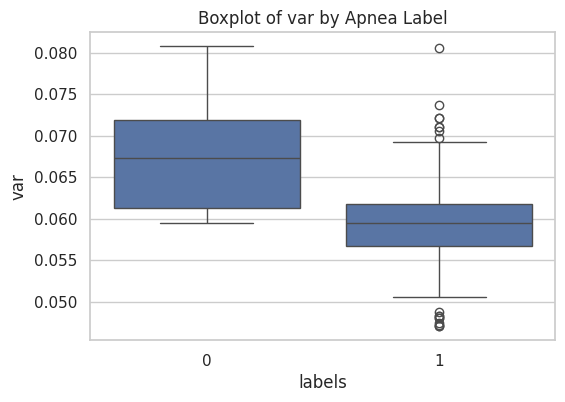

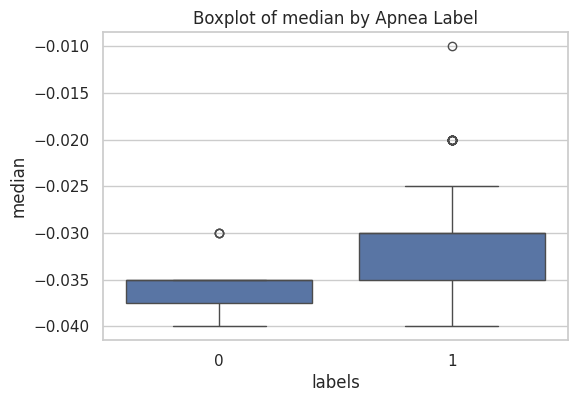

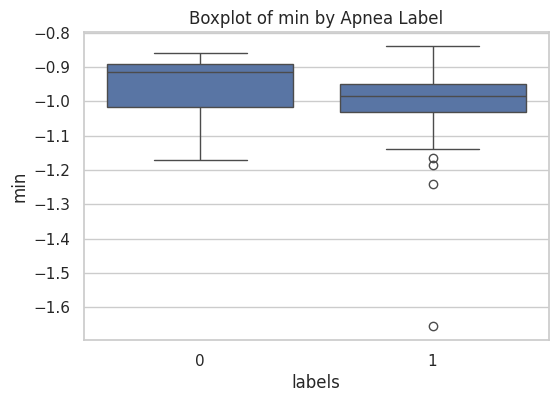

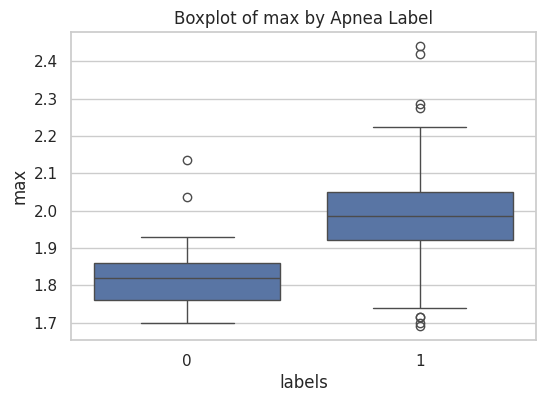

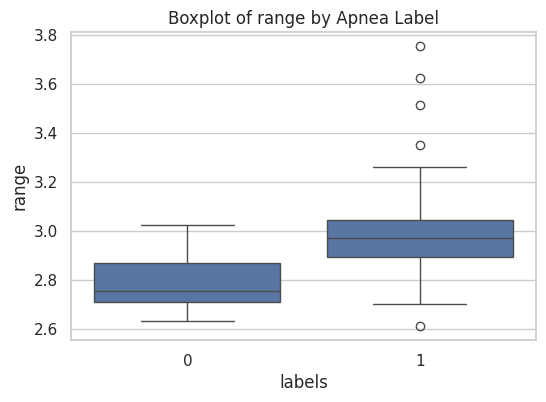

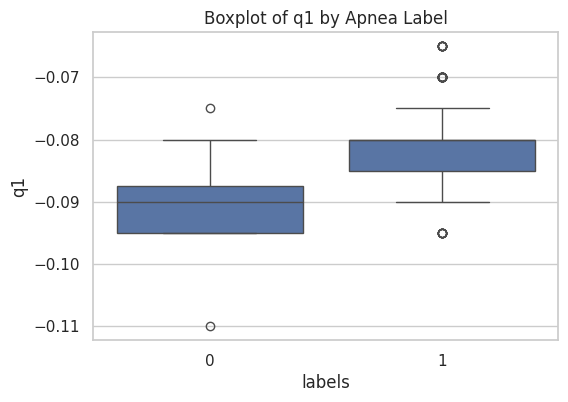

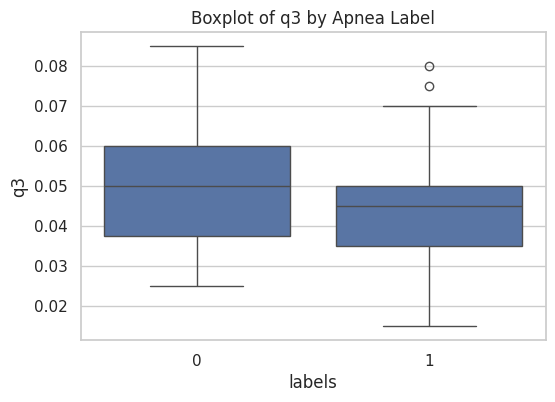

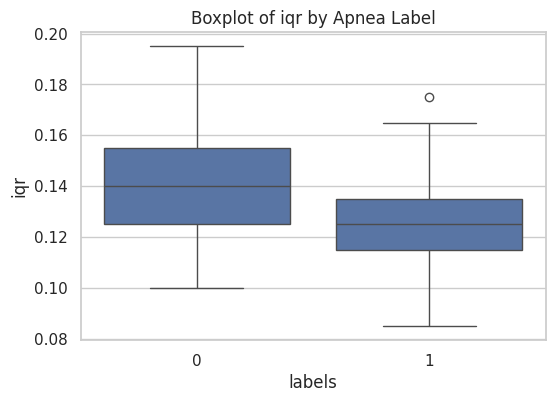

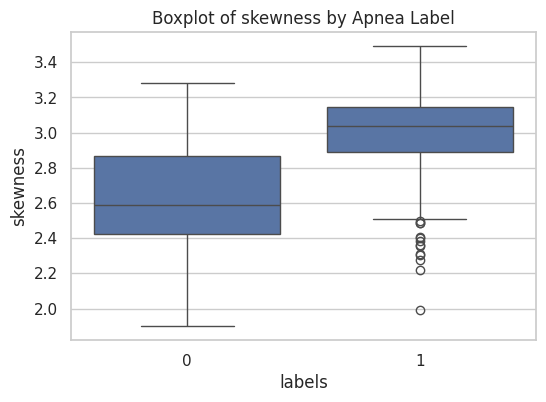

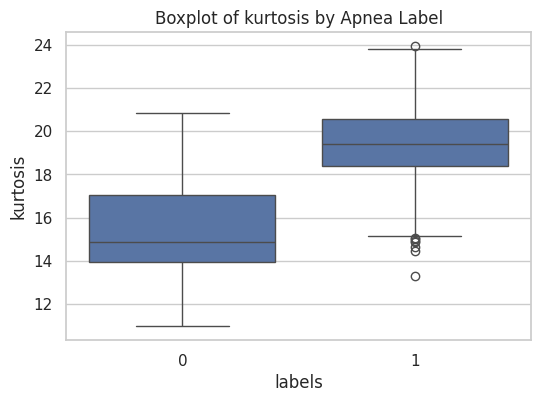

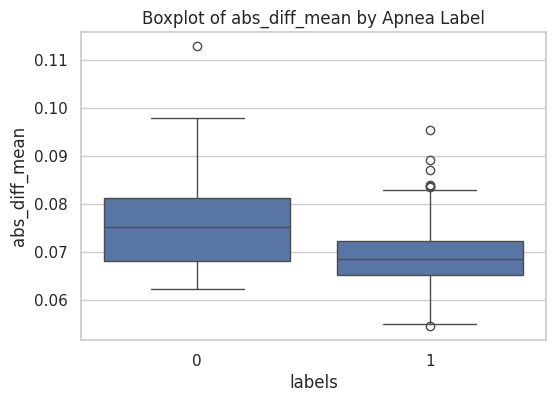

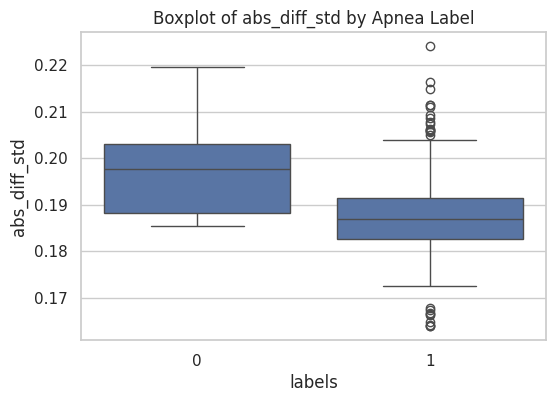

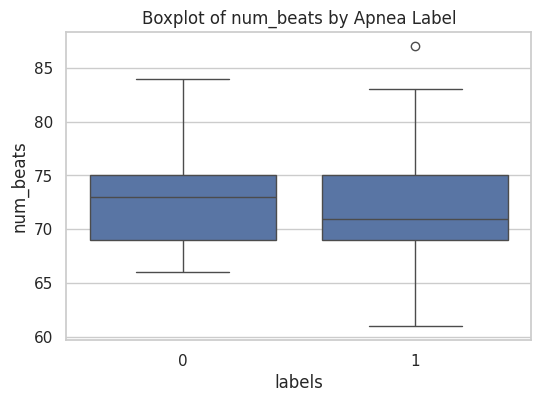

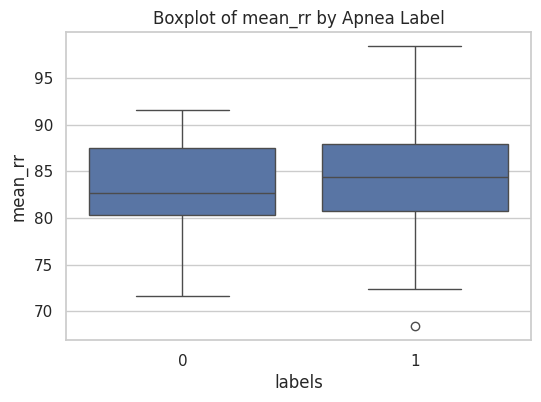

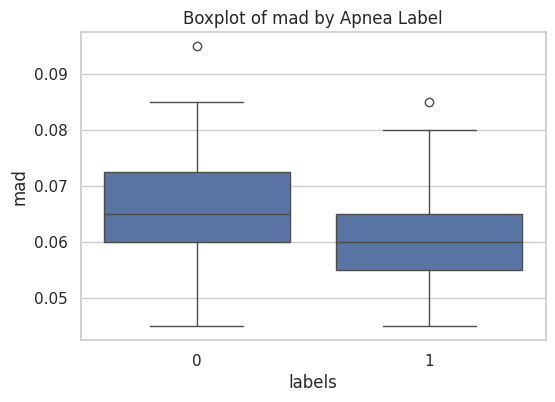

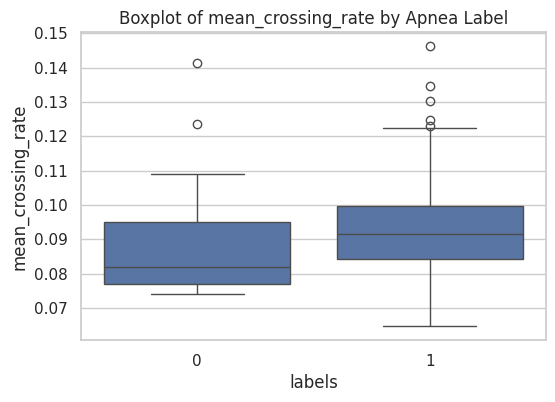

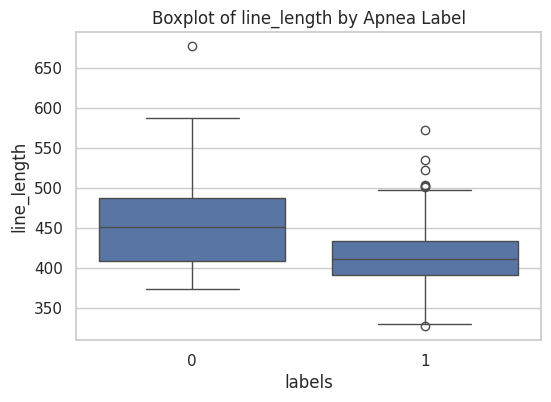

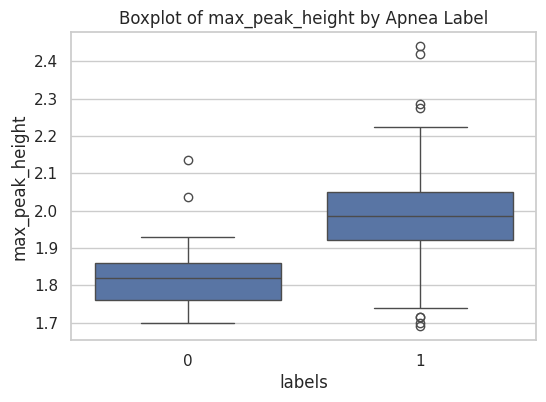

In [20]:
# 2. Boxplots for each feature
# Reason: See distribution, outliers, and feature variation across apnea vs normal.
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="labels", y=col, data=df)
    plt.title(f"Boxplot of {col} by Apnea Label")
    plt.show()

In [ ]:
# 4. Correlation Heatmap (no numbers)
# Reason: Show feature interdependence to identify redundancy or strong relationships.
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns="labels").corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# 5. Feature Distribution Histogram
# Reason: Check how each feature value is distributed across labels.
for col in df.columns[:-1][:5]:  # first 5 features
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="labels", kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution of {col} by Label")
    plt.show()

In [ ]:
# 6. PCA Scatter Plot (2D projection)
# Reason: Visualize separation in high-dimensional feature space using dimensionality reduction.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df.drop(columns="labels"))
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['labels'], palette='Set2')
plt.title("PCA Projection of Feature Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
# 7. Feature Importance from Random Forest
# Reason: Identify which features are most predictive of sleep apnea.
X = df.drop(columns="labels")
y = df["labels"]
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_

In [ ]:
# Plotting top 10 important features
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="Blues_r")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Transformation and Statistical Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

## scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)


In [ ]:
var_thresh = VarianceThreshold(threshold=0.0)
X_var_filtered = var_thresh.fit_transform(X_scaled)

non_constant_columns = X_features.columns[var_thresh.get_support()]


In [ ]:
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_var_filtered, y_cleaned)
selected_features = non_constant_columns[selector.get_support()]

In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)


## hypothesis testing

In [ ]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency, mannwhitneyu, pearsonr, wilcoxon
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE

In [ ]:
def perform_hypothesis_tests(X_features: pd.DataFrame, y: pd.Series, top_n=5):
    df = X_features.copy()
    df['label'] = y.values
    results = []

    for col in X_features.columns[:top_n]:
        group0 = df[df['label'] == 0][col]
        group1 = df[df['label'] == 1][col]

        try:
            f_stat, f_p = f_oneway(group0, group1)
        except:
            f_stat, f_p = np.nan, np.nan

        try:
            binned = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
            df['binned'] = binned.fit_transform(df[[col]])
            contingency = pd.crosstab(df['binned'], df['label'])
            chi2_stat, chi2_p, _, _ = chi2_contingency(contingency)
        except:
            chi2_stat, chi2_p = np.nan, np.nan

        try:
            t_stat, t_p = ttest_ind(group0, group1, equal_var=False)
        except:
            t_stat, t_p = np.nan, np.nan

        try:
            u_stat, u_p = mannwhitneyu(group0, group1)
        except:
            u_stat, u_p = np.nan, np.nan

        try:
            min_len = min(len(group0), len(group1))
            w_stat, w_p = wilcoxon(group0.iloc[:min_len], group1.iloc[:min_len])
        except:
            w_stat, w_p = np.nan, np.nan

        try:
            r, r_p = pearsonr(df[col], df['label'])
        except:
            r, r_p = np.nan, np.nan

        try:
            model = LinearRegression()
            model.fit(df[[col]], df['label'])
            r_squared = model.score(df[[col]], df['label'])
        except:
            r_squared = np.nan

        results.append({
            'Feature': col,
            'ANOVA_F': f_stat, 'ANOVA_p': f_p,
            'Chi2': chi2_stat, 'Chi2_p': chi2_p,
            'T_Stat': t_stat, 'T_p': t_p,
            'U_Stat': u_stat, 'U_p': u_p,
            'Wilcoxon_Stat': w_stat, 'Wilcoxon_p': w_p,
            'Pearson_r': r, 'Pearson_p': r_p,
            'R_Squared': r_squared
        })

    # Compute t-SNE
    tsne_df = None
    try:
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(X_features)
        tsne_df = pd.DataFrame(tsne_results, columns=['TSNE_1', 'TSNE_2'])
        tsne_df['label'] = y.values
    except Exception as e:
        print(f"t-SNE failed: {e}")

    return pd.DataFrame(results), tsne_df


In [ ]:
results_df, tsne_df = perform_hypothesis_tests(X_features, y, top_n=15)

if tsne_df is not None:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='TSNE_1', y='TSNE_2',
        hue='label',
        palette='coolwarm',
        data=tsne_df,
        alpha=0.7
    )
    plt.title("t-SNE Visualization of Features")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()


In [ ]:
results_df

# Model Training and Evaluation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_bal, y_bal = SMOTE().fit_resample(X_pca, y_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred)) #report

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # descending
top_n = 10

top_features = [selected_features[i] for i in indices[:top_n]]
top_scores = importances[indices[:top_n]]


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_scores, y=top_features, hue=top_features, palette="viridis", legend=False)
plt.title("Top 7 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


### Neural Network Classifier (Binary Classification)
Using a simple feedforward neural network trained on the same PCA-reduced and SMOTE-balanced dataset.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [ ]:
X_nn = X_pca
y_nn = y_cleaned.values

X_bal_nn, y_bal_nn = SMOTE().fit_resample(X_nn, y_nn)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_bal_nn, y_bal_nn, test_size=0.2, random_state=42
)

In [ ]:
model = Sequential([
    Input(shape=(X_train_nn.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)

In [ ]:
y_pred_nn = (model.predict(X_test_nn) > 0.5).astype("int32")

print("Neural Network Accuracy:", accuracy_score(y_test_nn, y_pred_nn))
print(classification_report(y_test_nn, y_pred_nn))

ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn)
plt.title("Neural Network Confusion Matrix")
plt.show()


In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# SVM Classifier

We will be using 4 different Kernels to compare accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\n----- Kernel: {kernel} -----")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')

    model.fit(X_train, y_train)

    y_pred_svm = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred_svm)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred_svm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

    results[kernel] = acc

In [ ]:
print("\n=== Accuracy Comparison ===")
for kernel, acc in results.items():
    print(f"{kernel}: {acc:.4f}")

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='cyan')
plt.title("SVM Kernel Accuracy Comparison")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, (k, v) in enumerate(results.items()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


# k-NN Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_features, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)

accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy:.2f}")


# Bayes Desicion Rule

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_bdr = df.drop(columns=['labels'])
y_bdr = df['labels']
X_train_bdr, X_test_bdr, y_train_bdr, y_test_bdr = train_test_split(X_bdr, y_bdr, test_size=0.2, random_state=42)


bdr_model = GaussianNB()
bdr_model.fit(X_train_bdr, y_train_bdr)


y_pred_bdr = bdr_model.predict(X_test_bdr)
print("BDR (GaussianNB) Accuracy:", accuracy_score(y_test_bdr, y_pred_bdr))
print(classification_report(y_test_bdr, y_pred_bdr))

# Results and Comparison

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

model_scores = [
    accuracy_score(y_test, y_pred),        # Random Forest
    accuracy_score(y_test_nn, y_pred_nn),  # Neural Network
    results['linear'],
    results['poly'],
    results['rbf'],
    results['sigmoid'],
    accuracy_score(y_test_knn, y_pred_knn),
    accuracy_score(y_test_bdr, y_pred_bdr)
]

results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'SVM - Linear', 'SVM - Poly', 'SVM - RBF', 'SVM - Sigmoid', 'k - NN', 'Bayes Decision Rule'],
    'Accuracy': model_scores
})


plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Model', palette='coolwarm', legend=False)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
for i, row in results_df.iterrows():
    plt.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center')
plt.tight_layout()
plt.show()

